In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [152]:
df = pd.read_csv("./lucas_soil_2018.csv")
df.head()

/var/folders/8t/l4w3q1y96ys6mn_9yk43kpfr0000gn/T/ipykernel_13815/1167546493.py:1: DtypeWarning: Columns (6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./lucas_soil_2018.csv")


,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,...,Lucas2015,Lucas2018,Coarse,Clay,Sand,Silt,PSDAvailable,TextureFromSurvey,USDA,ISSS
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3,< LOD,1.1,101.9,...,YES,YES,2.0,23.0,23.0,54.0,Yes,2009.0,silt loam,silty loam
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1,< LOD,1.3,51.2,...,YES,YES,6.0,15.0,47.0,38.0,Yes,2009.0,loam,silty loam
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1,12.3,3.1,114.8,...,YES,YES,4.0,23.0,11.0,66.0,Yes,2009.0,silt loam,silty loam
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3,< LOD,2,165.8,...,NO,YES,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2,< LOD,2.2,42.1,...,NO,YES,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN


In [153]:
df.columns

Index(['Depth', 'POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N',
       'K', 'OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'NUTS_0_x',
       'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG', 'SURVEY_DATE',
       'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc', 'NUTS_0_y',
       'Lucas2009', 'Lucas2012', 'Lucas2015', 'Lucas2018', 'Coarse', 'Clay',
       'Sand', 'Silt', 'PSDAvailable', 'TextureFromSurvey', 'USDA', 'ISSS'],
      dtype='object')

In [154]:
df.drop(
    columns=["Lucas2009", "Lucas2015", "Lucas2012", "Lucas2012", "Lucas2018"],
    inplace=True,
)
df.drop(columns=["TextureFromSurvey", "PSDAvailable", "NUTS_0_y"], inplace=True)

df.drop(columns=["SURVEY_DATE"], inplace=True)
df["NUTS_0"] = df["NUTS_0_x"]
df.drop(columns=["NUTS_0_x"], inplace=True)

df.drop(columns=["POINTID"], inplace=True)
df.drop(columns=["TH_LAT", "TH_LONG"], inplace=True)

print(df.columns)

Index(['Depth', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N', 'K',
       'OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'NUTS_1',
       'NUTS_2', 'NUTS_3', 'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc',
       'LU1_Desc', 'Coarse', 'Clay', 'Sand', 'Silt', 'USDA', 'ISSS', 'NUTS_0'],
      dtype='object')


In [155]:
df.replace("< LOD", np.nan, inplace=True)
df.replace("<  LOD", np.nan, inplace=True)
df.replace("<0.0", np.nan, inplace=True)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18984 entries, 0 to 18983
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Depth             18984 non-null  object 
 1   pH_CaCl2          18983 non-null  float64
 2   pH_H2O            18983 non-null  float64
 3   EC                18975 non-null  float64
 4   OC                18949 non-null  object 
 5   CaCO3             11212 non-null  object 
 6   P                 13981 non-null  object 
 7   N                 18969 non-null  object 
 8   K                 18944 non-null  object 
 9   OC (20-30 cm)     140 non-null    object 
 10  CaCO3 (20-30 cm)  14 non-null     float64
 11  Ox_Al             2510 non-null   float64
 12  Ox_Fe             2510 non-null   float64
 13  NUTS_1            18984 non-null  object 
 14  NUTS_2            18984 non-null  object 
 15  NUTS_3            18984 non-null  object 
 16  Elev              18984 non-null  int64 

In [157]:
df["CaCO3"] = df["CaCO3"].astype(float)
df["P"] = df["P"].astype(float)
df["K"] = df["K"].astype(float)
df["N"] = df["N"].astype(float)

In [158]:
df.describe()

,pH_CaCl2,pH_H2O,EC,CaCO3,P,N,K,CaCO3 (20-30 cm),Ox_Al,Ox_Fe,Elev,Coarse,Clay,Sand,Silt
count,18983.000000,18983.000000,18975.000000,11212.000000,13981.000000,18969.000000,18944.000000,14.000000,2510.000000,2510.000000,18984.000000,16275.000000,16728.000000,16728.000000,16728.000000
mean,5.706427,6.259460,18.389964,96.213566,34.721172,3.154605,204.456638,288.857143,1.171474,2.547171,613.188211,15.694869,19.974773,40.965208,39.055655
std,1.398586,1.319465,25.560630,164.632163,27.546879,3.716608,207.069427,236.021139,1.243111,2.431786,1461.681637,12.815397,13.642703,24.887923,17.497355
min,2.600000,3.340000,0.240000,1.000000,0.300000,0.200000,6.200000,1.000000,0.000000,0.100000,-55.000000,1.000000,0.000000,0.000000,0.000000
25%,4.500000,5.120000,8.095000,1.000000,16.600000,1.300000,85.000000,64.500000,0.600000,1.000000,124.000000,6.000000,9.000000,20.000000,26.000000
50%,5.800000,6.290000,13.950000,5.000000,26.500000,2.000000,153.000000,287.500000,0.900000,1.900000,261.000000,12.000000,18.000000,39.000000,39.000000
75%,7.100000,7.500000,20.600000,123.000000,44.000000,3.400000,261.000000,417.750000,1.300000,3.300000,666.250000,21.000000,28.000000,60.000000,51.000000
max,9.800000,10.430000,1295.600000,926.000000,515.000000,46.500000,7578.800000,702.000000,34.700000,35.800000,11464.000000,98.000000,95.000000,100.000000,93.000000


In [159]:
def grab_col_names(data, cat_th=10, car_th=20):
    # Categorical columns and categorical but high-cardinality columns
    cat_cols = [col for col in data.columns if data[col].dtypes == "O"]
    num_but_cat = [col for col in data.columns if data[col].nunique() < cat_th and data[col].dtypes != "O"]
    high_card_cat_cols = [col for col in data.columns if data[col].nunique() > car_th and data[col].dtypes == "O"]

    # Combine Object type columns and Low-unique-value numeric columns into cat_cols
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in high_card_cat_cols]

    # Numerical columns excluding those considered as categorical
    num_cols = [col for col in data.columns if data[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Display information about the dataset
    print(f"Observations: {data.shape[0]}")
    print(f"Variables: {data.shape[1]}")
    print(f"Categorical Columns: {len(cat_cols)}")
    print(f"Numerical Columns: {len(num_cols)}")
    print(f"High Cardinality Categorical Columns: {len(high_card_cat_cols)}")
    print(f"Number but Categorical Columns: {len(num_but_cat)}")
    print("\n")

    return cat_cols, num_cols, high_card_cat_cols


cat_cols, num_cols, high_card_cat_cols = grab_col_names(df)
print(f"Catergorical Columns: {cat_cols}")
print(f"Numerical Columns: {num_cols}")
print(f"High Cardinality Categorical Columns: {high_card_cat_cols}")

Observations: 18984
Variables: 29
Categorical Columns: 4
Numerical Columns: 15
High Cardinality Categorical Columns: 10
Number but Categorical Columns: 0


Catergorical Columns: ['Depth', 'LC0_Desc', 'USDA', 'ISSS']
Numerical Columns: ['pH_CaCl2', 'pH_H2O', 'EC', 'CaCO3', 'P', 'N', 'K', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'Elev', 'Coarse', 'Clay', 'Sand', 'Silt']
High Cardinality Categorical Columns: ['OC', 'OC (20-30 cm)', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'LC', 'LU', 'LC1_Desc', 'LU1_Desc', 'NUTS_0']


In [160]:
print(f"Total number of missing values: {df.isnull().sum().sum()}")

Total number of missing values: 97627


In [161]:
print(f"Number of Duplicate Rows: {df.duplicated().sum()}")

Number of Duplicate Rows: 0


In [162]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["float64"]).columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))

Categorical Columns: ['Depth', 'OC', 'OC (20-30 cm)', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc', 'USDA', 'ISSS', 'NUTS_0']
Numerical Columns: ['pH_CaCl2', 'pH_H2O', 'EC', 'CaCO3', 'P', 'N', 'K', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'Coarse', 'Clay', 'Sand', 'Silt']


In [163]:
def my_headmap(data, size):
    if size:
        plt.figure(figsize=size)
    sns.heatmap(data.corr(), annot=True, fmt=".1f", cmap="Blues", annot_kws={"size": 12})
    plt.title("Correlation Matrix")
    plt.show()

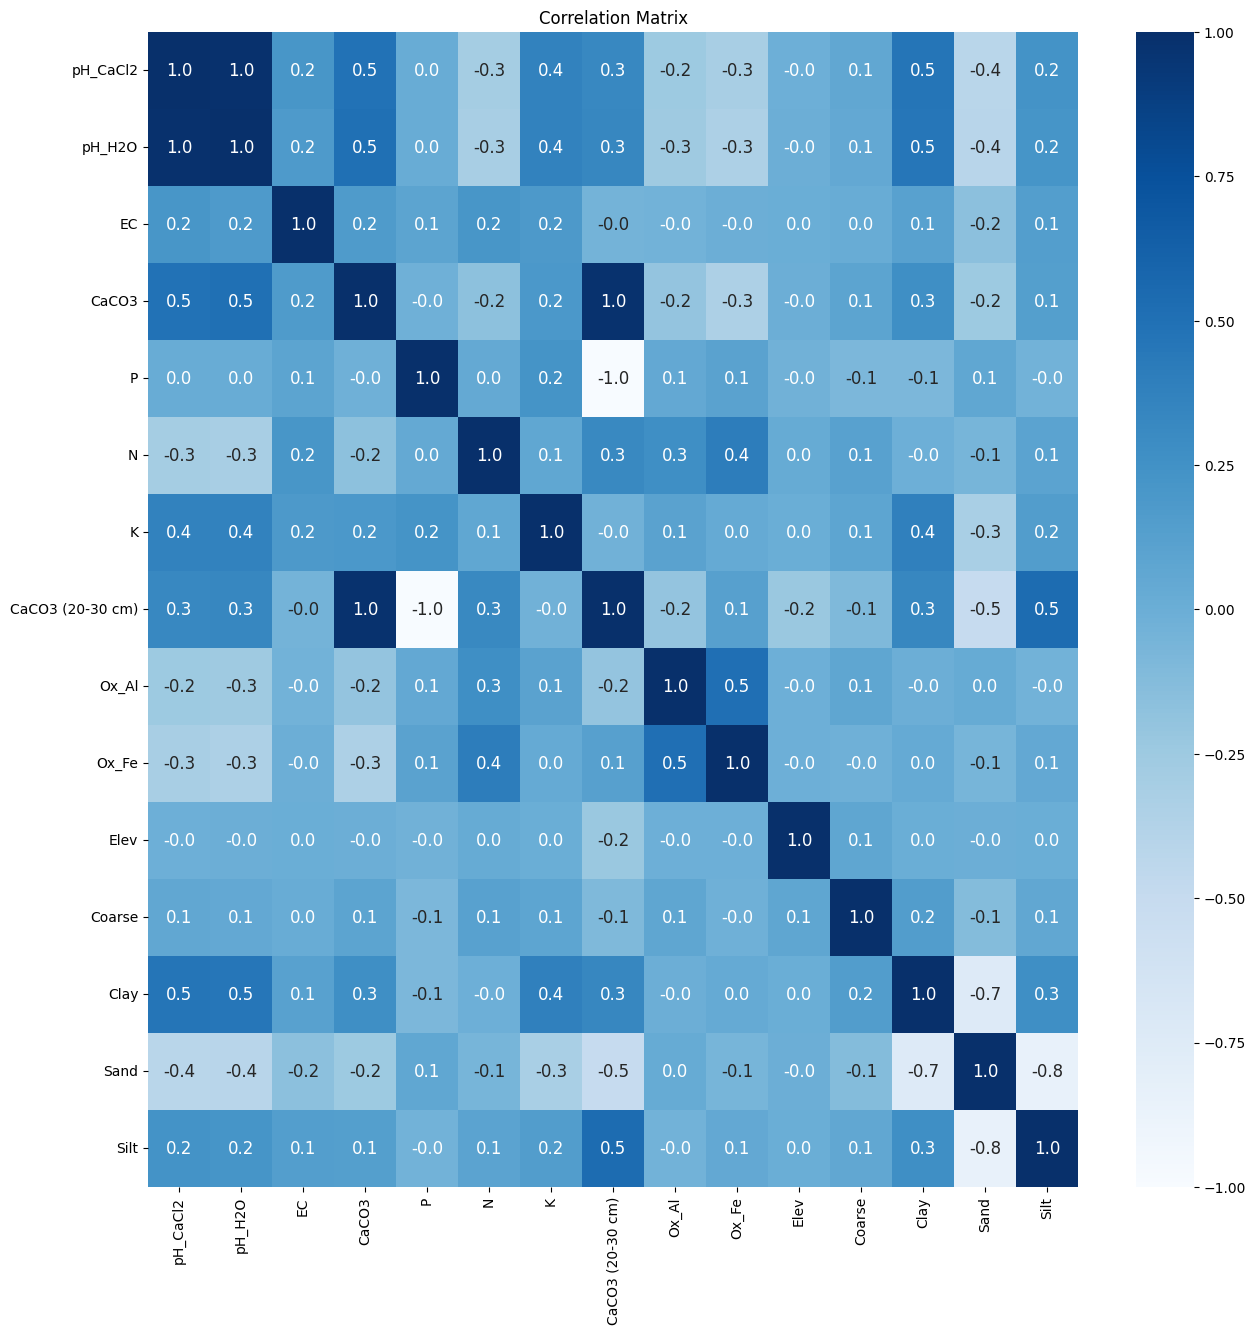

In [164]:
n_numeric_cols = len(numerical_cols)
my_headmap(
    df.select_dtypes(include=[np.number]),
    size=(n_numeric_cols + 1, n_numeric_cols + 1),
)

In [165]:
print(df.isnull().sum())  # Count missing values per column

Depth                   0
pH_CaCl2                1
pH_H2O                  1
EC                      9
OC                     35
CaCO3                7772
P                    5003
N                      15
K                      40
OC (20-30 cm)       18844
CaCO3 (20-30 cm)    18970
Ox_Al               16474
Ox_Fe               16474
NUTS_1                  0
NUTS_2                  0
NUTS_3                  0
Elev                    0
LC                      0
LU                      0
LC0_Desc                0
LC1_Desc                0
LU1_Desc                0
Coarse               2709
Clay                 2256
Sand                 2256
Silt                 2256
USDA                 2256
ISSS                 2256
NUTS_0                  0
dtype: int64


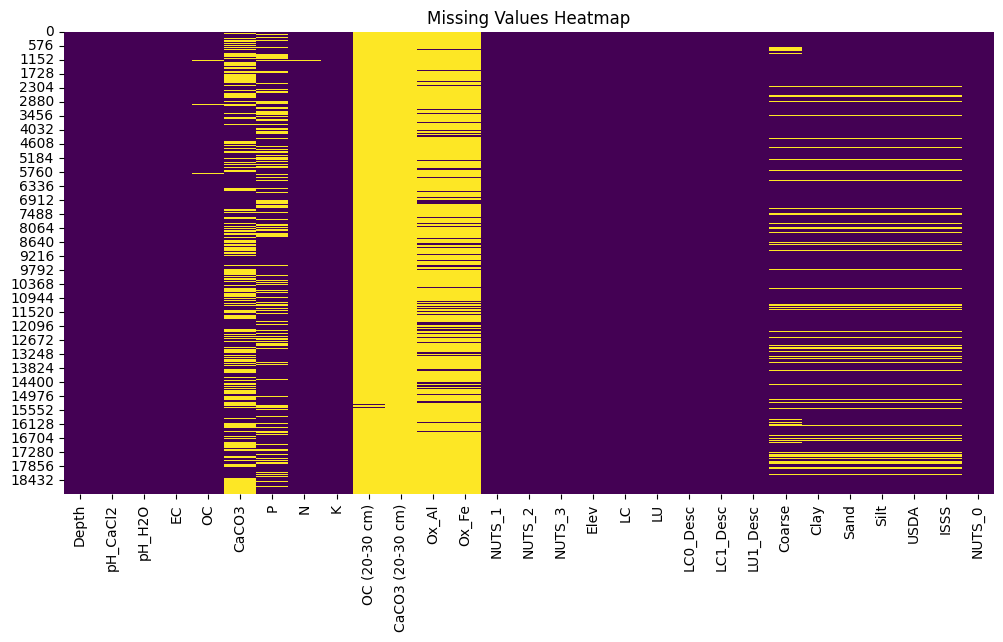

In [166]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [167]:
# Missing values percentage
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage = missing_percentage.sort_values(ascending=False)
print("Missing Values Percentage:")
print(missing_percentage)

Missing Values Percentage:
CaCO3 (20-30 cm)    99.926254
OC (20-30 cm)       99.262537
Ox_Fe               86.778340
Ox_Al               86.778340
CaCO3               40.939739
P                   26.353772
Coarse              14.269912
USDA                11.883692
Silt                11.883692
Sand                11.883692
Clay                11.883692
ISSS                11.883692
K                    0.210704
OC                   0.184366
N                    0.079014
EC                   0.047408
pH_H2O               0.005268
pH_CaCl2             0.005268
dtype: float64


In [168]:
def drop_missing_columns(df, threshold=0.8):
    """
    Drops columns from a pandas DataFrame if they have more than a specified percentage of missing values.

    Args:
      df: The pandas DataFrame.
      threshold: The threshold percentage of missing values (e.g., 0.8 for 80%).

    Returns:
      A new pandas DataFrame with the columns dropped.
    """
    missing_percentages = df.isnull().sum() / len(df)
    columns_to_drop = missing_percentages[missing_percentages > threshold].index
    print(columns_to_drop)
    return df.drop(columns=columns_to_drop)


df = drop_missing_columns(df, 0.8)

Index(['OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe'], dtype='object')


In [169]:
print(f"Remaining columns: {df.columns.tolist()}")


# Fillup missing values
def fill_missing_values(data):
    # Fill missing values for numerical columns with the mean
    numeric_cols = data.select_dtypes(include=["float64"]).columns
    numeric_fill = {col: data[col].mean() for col in numeric_cols}
    data.fillna(numeric_fill, inplace=True)

    # Fill missing values for categorical columns with the mode
    categorical_cols = data.select_dtypes(include=["object"]).columns
    categorical_fill = {col: data[col].mode()[0] for col in categorical_cols}
    data.fillna(categorical_fill, inplace=True)

    return data


df = fill_missing_values(df)
print(df.isnull().sum())  # Count missing values per column


Remaining columns: ['Depth', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N', 'K', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc', 'Coarse', 'Clay', 'Sand', 'Silt', 'USDA', 'ISSS', 'NUTS_0']
Depth       0
pH_CaCl2    0
pH_H2O      0
EC          0
OC          0
CaCO3       0
P           0
N           0
K           0
NUTS_1      0
NUTS_2      0
NUTS_3      0
Elev        0
LC          0
LU          0
LC0_Desc    0
LC1_Desc    0
LU1_Desc    0
Coarse      0
Clay        0
Sand        0
Silt        0
USDA        0
ISSS        0
NUTS_0      0
dtype: int64


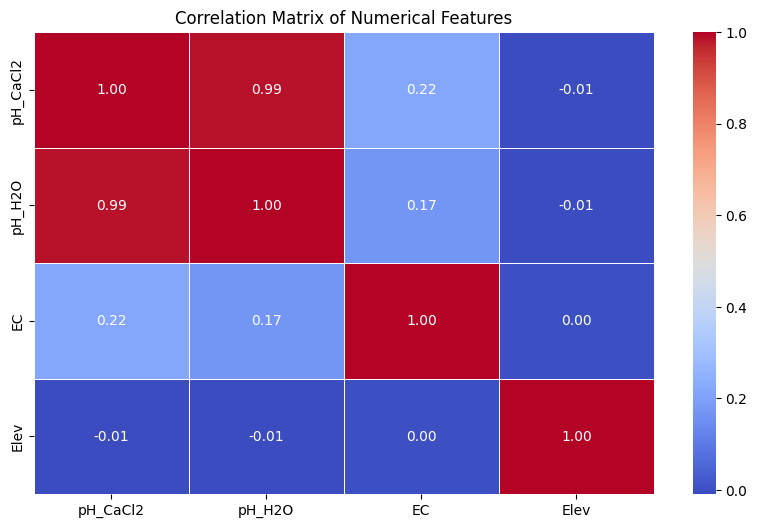

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[["pH_CaCl2", "pH_H2O", "EC", "Elev"]].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [171]:
# Label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder


def label_encode(data):
    le = LabelEncoder()
    for col in data.select_dtypes(include=["object"]).columns:
        print(f"Encoding {col}...")
        data[col] = le.fit_transform(data[col])
    return data


df = label_encode(df)
print(df.head())

Encoding Depth...
Encoding OC...
Encoding NUTS_1...
Encoding NUTS_2...
Encoding NUTS_3...
Encoding LC...
Encoding LU...
Encoding LC0_Desc...
Encoding LC1_Desc...
Encoding LU1_Desc...
Encoding USDA...
Encoding ISSS...
Encoding NUTS_0...
   Depth  pH_CaCl2  pH_H2O     EC    OC  CaCO3          P    N      K  NUTS_1  \
0      1       4.1    4.81   8.73   186    3.0  34.721172  1.1  101.9       0   
1      1       4.1    4.93   5.06   455    1.0  34.721172  1.3   51.2       0   
2      1       4.1    4.85  12.53  1533    1.0  12.300000  3.1  114.8       0   
3      1       5.5    5.80  21.10   932    3.0  34.721172  2.0  165.8       0   
4      1       6.1    6.48  10.89   605    2.0  34.721172  2.2   42.1       0   

   ...  LC0_Desc  LC1_Desc  LU1_Desc     Coarse       Clay       Sand  \
0  ...         7        32        12   2.000000  23.000000  23.000000   
1  ...         7        55        12   6.000000  15.000000  47.000000   
2  ...         7        36        12   4.000000  23.000000

In [172]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = df.drop(columns=["pH_H2O", "pH_CaCl2"])
y = df["pH_H2O"]
print("Features shape:", X.shape)
print("Target shape:", y.shape)
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Features shape: (18984, 23)
Target shape: (18984,)
X_train shape: (15187, 23)
X_test shape: (3797, 23)
y_train shape: (15187,)
y_test shape: (3797,)


In [173]:
# Model training
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
import xgboost as xgb

# Define the models
models = {
    "MLP": MLPRegressor(max_iter=1000),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "CatBoost": CatBoostRegressor(),
}
# Initialize a dictionary to store the results
results = {}
# Iterate through the models
for model_name, model in models.items():
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline(
        [
            (
                "preprocessor",
                ColumnTransformer(
                    transformers=[
                        (
                            "num",
                            StandardScaler(),
                            X.select_dtypes(include=["float64"]).columns,
                        ),
                        (
                            "cat",
                            "passthrough",
                            X.select_dtypes(include=["int64"]).columns,
                        ),
                    ]
                ),
            ),
            ("model", model),
        ]
    )

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {"MSE": mse, "R2": r2}

Learning rate set to 0.062929
0:	learn: 1.2535796	total: 2.1ms	remaining: 2.1s
1:	learn: 1.1979212	total: 3.75ms	remaining: 1.87s
2:	learn: 1.1465760	total: 5.36ms	remaining: 1.78s
3:	learn: 1.0975245	total: 7.05ms	remaining: 1.75s
4:	learn: 1.0541583	total: 8.62ms	remaining: 1.72s
5:	learn: 1.0141636	total: 10.3ms	remaining: 1.7s
6:	learn: 0.9775793	total: 12ms	remaining: 1.7s
7:	learn: 0.9413138	total: 13.6ms	remaining: 1.69s
8:	learn: 0.9088178	total: 15.2ms	remaining: 1.67s
9:	learn: 0.8794190	total: 16.8ms	remaining: 1.67s
10:	learn: 0.8528740	total: 18.7ms	remaining: 1.68s
11:	learn: 0.8284625	total: 20.4ms	remaining: 1.68s
12:	learn: 0.8057040	total: 21.9ms	remaining: 1.67s
13:	learn: 0.7849148	total: 23.5ms	remaining: 1.66s
14:	learn: 0.7659675	total: 25.1ms	remaining: 1.65s
15:	learn: 0.7489798	total: 26.6ms	remaining: 1.64s
16:	learn: 0.7321470	total: 28.5ms	remaining: 1.65s
17:	learn: 0.7185485	total: 30.2ms	remaining: 1.65s
18:	learn: 0.7047377	total: 31.8ms	remaining: 1.64

Model Performance:
MLP: MSE = 1.5147, R2 = 0.1486
Random Forest: MSE = 0.2590, R2 = 0.8544
Decision Tree: MSE = 0.5158, R2 = 0.7101
Extra Trees: MSE = 0.2605, R2 = 0.8536
XGBoost: MSE = 0.2544, R2 = 0.8570
CatBoost: MSE = 0.2261, R2 = 0.8729


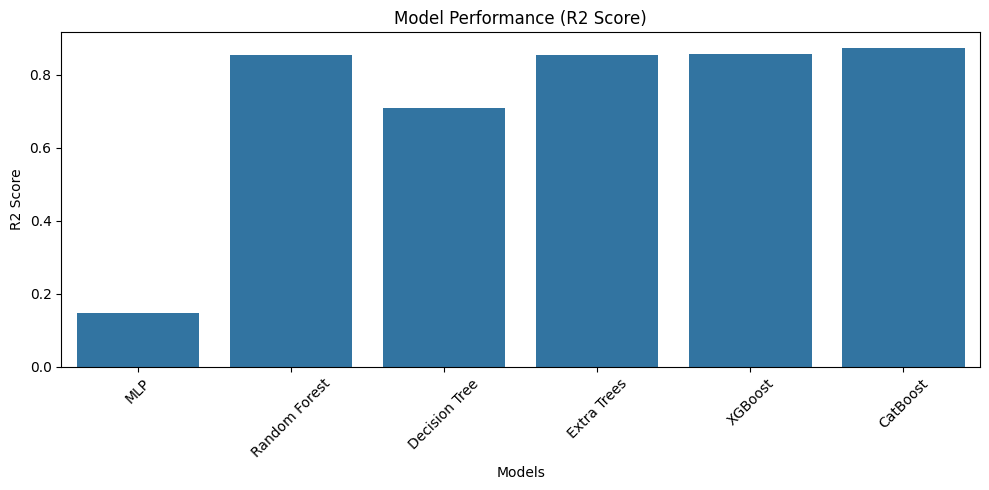

In [174]:
print("Model Performance:")
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.4f}, R2 = {metrics['R2']:.4f}")
# Visualize the results
plt.figure(figsize=(10, 5))
sns.barplot(
    x=list(results.keys()),
    y=[metrics["R2"] for metrics in results.values()],
)
plt.title("Model Performance (R2 Score)")
plt.ylabel("R2 Score")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [196]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

num_features = X_train.shape[1]
print(f"Number of features: {num_features}")

# callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Define MLP model
model = Sequential(
    [
        Dense(256, activation="relu", input_shape=(X_train.shape[1],), kernel_regularizer="l2"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation="relu", kernel_regularizer="l2"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation="relu", kernel_regularizer="l2"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation="linear"),  # Output for regression
    ]
)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Number of features: 23
Epoch 1/100


/Users/rafi/.local/share/mise/installs/python/3.12.7/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 38.9706 - mae: 5.7874 - val_loss: 16.1276 - val_mae: 3.4799
Epoch 2/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 11.5871 - mae: 2.5846 - val_loss: 3.4105 - val_mae: 0.8964
Epoch 3/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 5.7749 - mae: 1.4286 - val_loss: 3.0577 - val_mae: 0.8900
Epoch 4/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 4.6824 - mae: 1.3082 - val_loss: 2.7611 - val_mae: 0.8430
Epoch 5/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 4.1968 - mae: 1.2518 - val_loss: 2.5725 - val_mae: 0.8237
Epoch 6/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 3.8666 - mae: 1.2160 - val_loss: 2.3648 - val_mae: 0.8075
Epoch 7/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 3.5301 - mae: 1.1679 - val_loss: 2.2463 - val_mae: 0.8128
Epoch 8/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 3.1562 - mae: 1.1047 - val_loss: 2.1487 - val_mae: 0.8074
Epoch 9/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/

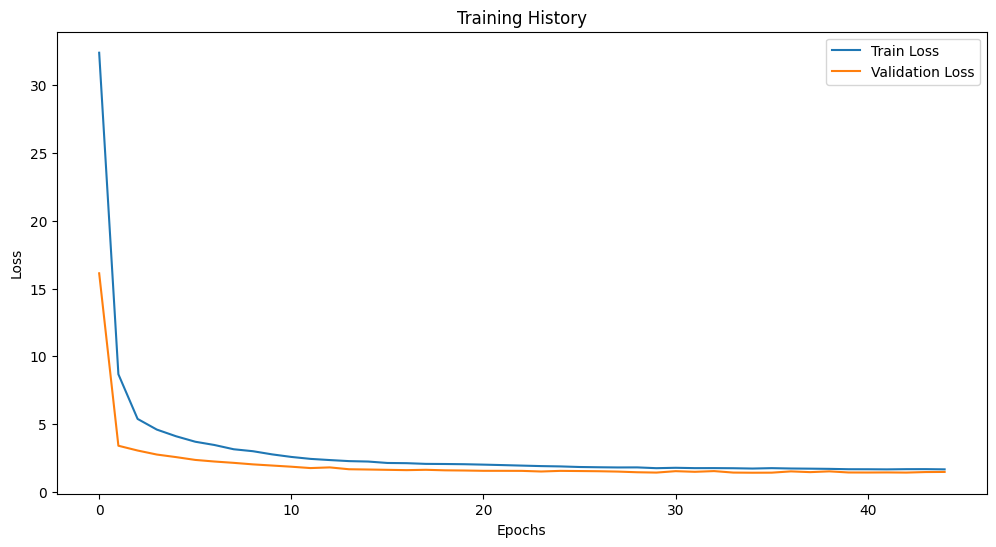

In [197]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4359 - mae: 0.8412
Test Loss: 1.5111, Test MAE: 0.8546
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test RMSE: 1.0552


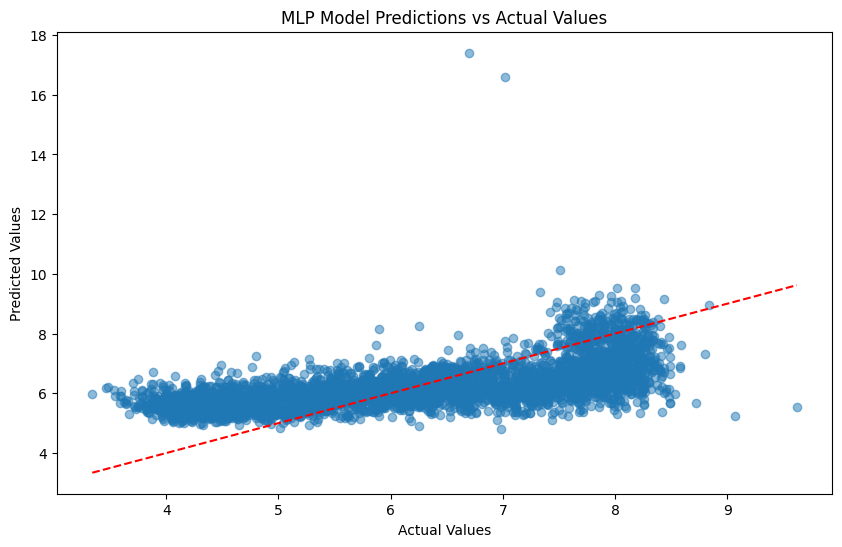

In [198]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")
# Make predictions
y_pred = model.predict(X_test)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.4f}")
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("MLP Model Predictions vs Actual Values")
plt.show()

R2 Score: 0.3741


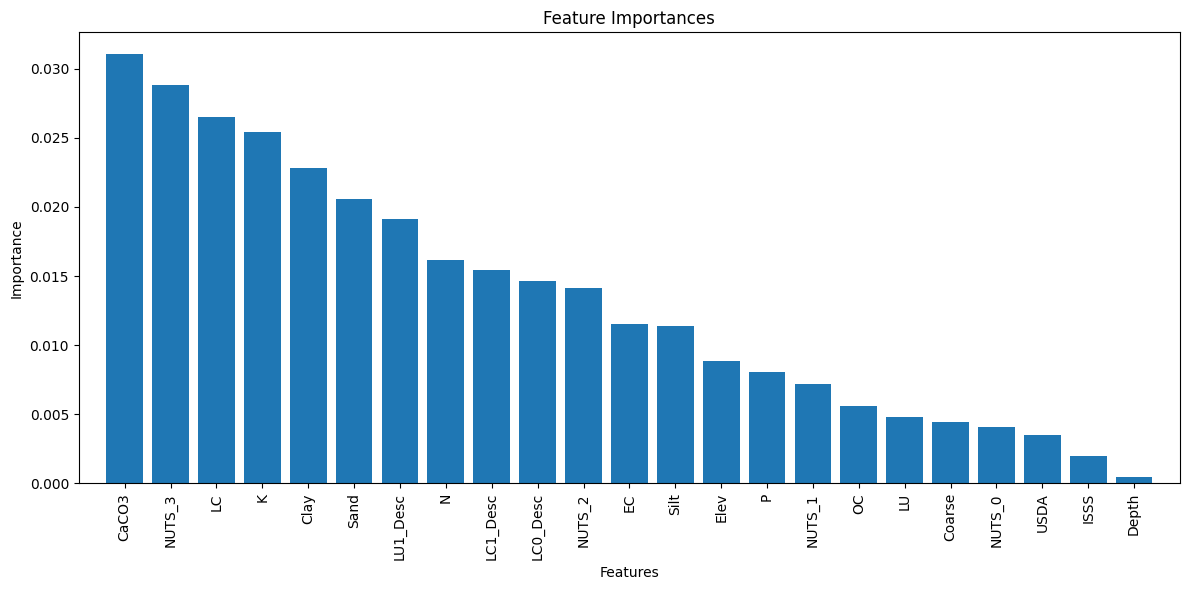

In [199]:
# Accruacy of the model
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")
# Feature importance
importances = model.layers[0].get_weights()[0]
importances = np.mean(np.abs(importances), axis=1)
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()